# Housing Price Estimator for Greater Seattle housing data set

## Data set
 Data consists actual homes listing for 2 months till Mid-May 2021. It contains Active, Sold listings, Property details - Status(Active/Sold), ZipCode,City, City Code, State, Price, Days_on_market, Beds, Baths, Sqft, Date of listing,Acres and Lot_size. We then added Livibility Index(Liv_index from https://www.areavibes.com/) based on the city which ranges from 50-90.

## Exploratory Data Analysis
<p> 1. Data was cleaned to remove nan and null values. 
<p> 2. Dtypes of Columns were changed from object to str/int/float/date as required.
<p> 3. Price was cleaned to remove commas. 
<p> 4. Some columns like State, City Code were dropped as they do not add value to the model.

## Model:
<p> 1. Linear Regression Model :- Linear Regression model is applied on X=variables other than price and y = Price in a sequential manner. First we check the Regression of only price and sq_ft. Then with every iteration we add on more variable to X to see the impact of the addition to the accuracy. The iteration with the best accuracy is consoidered. 

<p> 2. Random Forest Regression Model: We consider all variable for X except price.


In [102]:
import pandas as pd #
import numpy as np #
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [103]:
filepath='cleaned_data.csv'
data=pd.read_csv(filepath,infer_datetime_format=True)
data.head()

,Unnamed: 0,Status,ZipCode,City,Price,Days_on_market,Beds,Baths,Sqft,Date,Acres,Lot_sqft,Liv_index
0,0,A,98001,Auburn,725000,4.0,3.0,0.00,3060,2021-05-26,0.227,9894.0,68.0
1,1,A,98001,Auburn,300000,4.0,2.0,1.00,920,2021-05-26,0.164,7150.0,68.0
2,2,S,98001,Auburn,555000,3.0,2.0,1.00,1196,2021-05-07,0.544,23689.0,68.0
3,3,A,98001,Auburn,1300000,220.0,4.0,1.75,2850,2020-10-22,6.000,261360.0,68.0
4,4,S,98001,Auburn,250000,46.0,2.0,1.50,1200,2021-05-20,0.220,9600.0,68.0


In [104]:
clean=data.copy()
clean.drop(columns=['Unnamed: 0','Status','Days_on_market','Date','Acres'], inplace=True) #'City',,'ZipCode'
clean.head()

,ZipCode,City,Price,Beds,Baths,Sqft,Lot_sqft,Liv_index
0,98001,Auburn,725000,3.0,0.00,3060,9894.0,68.0
1,98001,Auburn,300000,2.0,1.00,920,7150.0,68.0
2,98001,Auburn,555000,2.0,1.00,1196,23689.0,68.0
3,98001,Auburn,1300000,4.0,1.75,2850,261360.0,68.0
4,98001,Auburn,250000,2.0,1.50,1200,9600.0,68.0


In [105]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ZipCode    4128 non-null   int64  
 1   City       4128 non-null   object 
 2   Price      4128 non-null   int64  
 3   Beds       4128 non-null   float64
 4   Baths      4128 non-null   float64
 5   Sqft       4128 non-null   int64  
 6   Lot_sqft   4128 non-null   float64
 7   Liv_index  4128 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 258.1+ KB


In [106]:
clean['Liv_index']=clean['Liv_index'].astype(int) # Cahnged the dtype for Zipcode from float to int
clean['Liv_index'].dtype

dtype('int32')

In [107]:
clean.groupby(['City', 'ZipCode']).agg(['min','max'])

Price          Beds      Baths        Sqft         \
                          min      max  min  max   min   max   min    max   
City         ZipCode                                                        
Algona       98001     280000   529950  2.0  4.0  0.75  3.00   820   1965   
             98047     417000   417000  2.0  2.0  1.00  1.00   870    870   
Auburn       98001     250000  2450000  2.0  6.0  0.00  5.00   920   8900   
             98002     300000   690000  0.0  5.0  0.00  3.25   620   3510   
             98092     220000  2400000  0.0  6.0  0.00  5.00   820   6910   
...                       ...      ...  ...  ...   ...   ...   ...    ...   
Tukwila      98188     335000   795000  2.0  5.0  1.50  4.00   960   3270   
Vashon       98070     385000  3200000  1.0  4.0  1.00  4.50   820   5000   
Woodinville  98072     580000  8500000  2.0  6.0  1.00  5.00  1250  10986   
             98077     750000  3095000  3.0  8.0  1.50  4.75  1330   6900   
Yarrow Point 98004    2350000  3775000  3.0  5.0  2.50  4.75  2970   6570   

                     Lot_sqft            Liv_index      
                          min        max       min max  
City         ZipCode                                    
Algona       98001     4500.0    16000.0        68  68  
             98047    17032.0    17032.0        68  68  
Auburn       98001     4500.0   265280.0        68  68  
             98002     1679.0    30273.0        68  68  
             98092        1.0  1576001.0        68  68  
...                       ...        ...       ...  ..  
Tukwila      98188     6635.0    29065.0        59  59  
Vashon       98070     1164.0   443961.0        79  79  
Woodinville  98072     3243.0  2664836.0        83  83  
             98077     9750.0   322488.0        83  83  
Yarrow Point 98004    12072.0    13416.0        85  85  

[108 rows x 12 columns]

In [108]:
#Grouped by City and then Liv_index to see the count. Both City and Liv_index represent same values.Whereas a city can have many Zipcodes 
clean.groupby(['City','Liv_index']).count() 

,,ZipCode,Price,Beds,Baths,Sqft,Lot_sqft
City,Liv_index,,,,,,
Algona,68,9,9,9,9,9,9
Auburn,68,163,163,163,163,163,163
Beaux Arts,77,1,1,1,1,1,1
Bellevue,83,172,172,172,172,172,172
Black Diamond,71,60,60,60,60,60,60
Bothell,79,50,50,50,50,50,50
Burien,66,73,73,73,73,73,73
Carnation,77,26,26,26,26,26,26
Clyde Hill,83,5,5,5,5,5,5


In [109]:
pd.unique(clean['Liv_index'])

array([68, 63, 81, 85, 84, 64, 79, 71, 83, 78, 74, 80, 69, 77, 82, 86, 66,
       67, 59])

In [110]:
# So we can drop zipcode
# clean1=clean.drop(columns=['ZipCode'])
clean1=clean.copy()

In [111]:
clean1.groupby(['City']).agg(['min','max']) # We can see the min/max price/bed/baths/sqft for each city. 

ZipCode           Price           Beds       Baths         \
                     min    max      min       max  min   max   min    max   
City                                                                         
Algona             98001  98047   280000    529950  2.0   4.0  0.75   3.00   
Auburn             98001  98092   220000   2450000  0.0   6.0  0.00   5.00   
Beaux Arts         98004  98004  3380000   3380000  3.0   3.0  2.75   2.75   
Bellevue           98004  98008   640000  13998000  0.0  13.0  0.00   9.25   
Black Diamond      98010  98010   170000   2950000  1.0   5.0  0.00   4.75   
Bothell            98011  98028   323000   1850000  2.0   6.0  1.75   5.00   
Burien             98146  98168   390000   3395000  1.0   6.0  1.00   5.50   
Carnation          98014  98014   352500   2940000  2.0   6.0  1.00   4.00   
Clyde Hill         98004  98004  3000000   5800000  4.0   6.0  3.00   6.75   
Covington          98042  98042   340000   1550000  0.0   5.0  0.00   4.25   
Des Moines         98003  98198   350000   1698000  0.0   5.0  0.00   3.00   
Duvall             98019  98019   674995   1649000  3.0   5.0  1.75   3.75   
Enumclaw           98022  98022   340000   2900000  1.0   5.0  0.75   4.50   
Fall City          98024  98024   575000   2210000  2.0   5.0  1.00   3.50   
Federal Way        98001  98023   195000   2300000  0.0   6.0  0.00   5.50   
Hobart             98025  98025  1495000   1495000  3.0   3.0  1.50   1.50   
Issaquah           98027  98050   425000  11998000  2.0   7.0  1.00   7.00   
Kenmore            98020  98028   560000   1988000  2.0   6.0  1.00   4.50   
Kent               98030  98042   232000   1600000  2.0   8.0  1.00   5.25   
Kirkland           98033  98034   500000  10700000  0.0   6.0  0.00   5.50   
Lake Forest Park   98115  98155   558000   2700000  3.0  10.0  1.00   4.75   
Maple Valley       98038  98038   360000   4200000  1.0   6.0  1.00   4.50   
Medina             98039  98039  1902000  22500000  3.0   7.0  0.00   7.00   
Mercer Island      98040  98040  1165000  17800000  3.0   5.0  1.25   8.50   
Newcastle          98056  98059   700000   2415000  3.0   5.0  1.75   4.25   
Normandy Park      98166  98198   490000   1650000  2.0   5.0  1.00   4.75   
North Bend         98045  98045   279000   5899000  1.0   6.0  1.00   6.50   
Pacific            98047  98047   310000    775000  2.0   5.0  1.00   3.00   
Preston            98050  98050   526650   1860000  1.0   4.0  1.50   3.25   
Ravensdale         98051  98051   505000   1925000  3.0   5.0  1.75   4.00   
Redmond            98033  98053   480000   7950000  1.0   7.0  1.00   8.25   
Renton             98055  98059   380000   4200000  1.0   6.0  0.75   5.00   
Sammamish          98029  98075   699000   6288000  0.0   6.0  0.00   7.75   
SeaTac             98168  98198   260000   1295000  1.0   5.0  1.00   3.50   
Seattle            98013  98199   139000  27500000  0.0  11.0  0.00  11.70   
Shoreline          98026  98177   479000   4350000  2.0   7.0  0.75   9.25   
Snoqualmie         98065  98065   459000   1800000  2.0   5.0  1.00   5.50   
Tukwila            98168  98188   335000    825000  2.0   5.0  1.00   4.00   
Vashon             98070  98070   385000   3200000  1.0   4.0  1.00   4.50   
Woodinville        98072  98077   580000   8500000  2.0   8.0  1.00   5.00   
Yarrow Point       98004  98004  2350000   3775000  3.0   5.0  2.50   4.75   

                  Sqft          Lot_sqft            Liv_index      
                   min    max        min        max       min max  
City                                                               
Algona             820   1965     4500.0    17032.0        68  68  
Auburn             620   8900        1.0  1576001.0        68  68  
Beaux Arts        3390   3390    15630.0    15630.0        77  77  
Bellevue           910  15360        1.0   436598.0        83  83  
Black Diamond      660   7430     2252.0   226512.0        71  71  
Bothell           1150   4090     3320.0

In [112]:
## Model - Linear Regression

In [113]:
# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

In [114]:
# Linear regression using price as target (y) and sqft as X
df=clean1.copy()
df=df.drop(columns=['City'])
df.head()

,ZipCode,Price,Beds,Baths,Sqft,Lot_sqft,Liv_index
0,98001,725000,3.0,0.00,3060,9894.0,68
1,98001,300000,2.0,1.00,920,7150.0,68
2,98001,555000,2.0,1.00,1196,23689.0,68
3,98001,1300000,4.0,1.75,2850,261360.0,68
4,98001,250000,2.0,1.50,1200,9600.0,68


In [115]:
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns)

In [116]:
df_scaled.head()

,ZipCode,Price,Beds,Baths,Sqft,Lot_sqft,Liv_index
0,-1.555306,-0.363496,-0.475833,-2.561712,0.555529,-0.120375,-0.3604
1,-1.555306,-0.709294,-1.434467,-1.490792,-1.129448,-0.143178,-0.3604
2,-1.555306,-0.501816,-1.434467,-1.490792,-0.912133,-0.005737,-0.3604
3,-1.555306,0.104348,0.482800,-0.687602,0.390180,1.969339,-0.3604
4,-1.555306,-0.749976,-1.434467,-0.955332,-0.908983,-0.122818,-0.3604


In [117]:
X=df_scaled.copy()
X=X.drop(columns = ['Price','Beds','Baths','Lot_sqft','Liv_index','ZipCode'])

In [118]:
X.shape

(4128, 1)

In [119]:
y=df_scaled['Price']

In [120]:
y.shape

(4128,)

In [121]:
### A) Linear model with only Sqft as X and Price as y

In [122]:


X=df_scaled.copy()
X=X.drop(columns = ['Price','Beds','Baths','Lot_sqft','Liv_index','ZipCode'])
y=df_scaled['Price']

# Model 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
model=LinearRegression()
model.fit(X_train,y_train)
accuracy=model.score(X_test,y_test)
print(f'Model: {X.columns.values}')
print(f'Linear Regression accuracy : {accuracy*100}')
print('coefficients :',model.coef_)
print('intercept :',model.intercept_)

Model: ['Sqft']
Linear Regression accuracy : 52.872331345766256
coefficients : [0.69220697]
intercept : 0.0019812094730009048


### 2) Linear model with Sqft and Zipcode as X and Price as y

In [123]:


X=df_scaled.copy()
X=X.drop(columns = ['Price','Baths','Lot_sqft','Liv_index','Beds'])
y=df_scaled['Price']

# Model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
model=LinearRegression()
model.fit(X_train,y_train)
accuracy=model.score(X_test,y_test)
print(f'Model: {X.columns.values}')
print(f'Linear Regression accuracy: {accuracy*100}')
print('coefficients :',model.coef_)
print('intercept :',model.intercept_)

Model: ['ZipCode' 'Sqft']
Linear Regression accuracy: 53.08179542107352
coefficients : [0.04702392 0.70095484]
intercept : 0.0018999702650000002


In [124]:
# We can see tha there is a slight improvement in the accuarcy on adding Zipcode and coefficients are +ve

### 3) Linear model with only Sqft, ZipCode, Beds as X and Price as y. (Adding Beds to X)

In [125]:


X=df_scaled.copy()
X=X.drop(columns = ['Price','Baths','Lot_sqft','Liv_index'])
y=df_scaled['Price']

# Model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
model=LinearRegression()
model.fit(X_train,y_train)
accuracy=model.score(X_test,y_test)
print(f'Model: {X.columns.values}')
print(f'Linear Regression accuracy: {accuracy*100}')
print('coefficients :',model.coef_)
print('intercept :',model.intercept_)

Model: ['ZipCode' 'Beds' 'Sqft']
Linear Regression accuracy: 53.98548476409304
coefficients : [ 0.03760067 -0.22696456  0.84932067]
intercept : 0.004469908053293792


### 4) Linear model with only Sqft, ZipCode, Beds, Baths as X and Price as y. Now adding Beds to X

In [126]:


X=df_scaled.copy()
X=X.drop(columns = ['Price','Lot_sqft','Liv_index'])
y=df_scaled['Price']

# Model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
model=LinearRegression()
model.fit(X_train,y_train)
accuracy=model.score(X_test,y_test)
print(f'Model: {X.columns.values}')
print(f'Linear Regression accuracy: {accuracy*100}')
print('coefficients :',model.coef_)
print('intercept :',model.intercept_)

Model: ['ZipCode' 'Beds' 'Baths' 'Sqft']
Linear Regression accuracy: 54.44198757650071
coefficients : [ 0.03879033 -0.24037046  0.05862192  0.81134244]
intercept : 0.004435042919612636


In [127]:
### 5) Linear model with only Sqft, ZipCode, Beds, Baths and Lot_sqft as X and Price as y. (Adding Lot_sqft to X)

In [128]:


X=df_scaled.copy()
X=X.drop(columns = ['Price','Liv_index'])
y=df_scaled['Price']

# Model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
model=LinearRegression()
model.fit(X_train,y_train)
accuracy=model.score(X_test,y_test)
print(f'Model: {X.columns.values}')
print(f'Linear Regression accuracy: {accuracy*100}')
print('coefficients :',model.coef_)
print('intercept :',model.intercept_)

Model: ['ZipCode' 'Beds' 'Baths' 'Sqft' 'Lot_sqft']
Linear Regression accuracy: 54.45976509436168
coefficients : [ 0.03947543 -0.23968553  0.05905461  0.81003482  0.00604793]
intercept : 0.0043832636714478245


In [129]:
### 6) Linear model with only Sqft, ZipCode, Beds, Baths, Lot_sqft and Liv_index as X and Price as y. (Adding Liv_index to X)

In [130]:

X=df_scaled.copy()
X=X.drop(columns = ['Price','Lot_sqft'])
y=df_scaled['Price']

# Model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
model=LinearRegression()
model.fit(X_train,y_train)
accuracy=model.score(X_test,y_test)
print(f'Model: {X.columns.values}')
print(f'Linear Regression accuracy: {accuracy*100}')
print('coefficients :',model.coef_)
print('intercept :',model.intercept_)

Model: ['ZipCode' 'Beds' 'Baths' 'Sqft' 'Liv_index']
Linear Regression accuracy: 54.86448948219853
coefficients : [ 0.0697512  -0.2392924   0.05839309  0.79977286  0.06390659]
intercept : 0.004155393510329217


In [131]:
# We can see that Sqft has the highest impact on the price of the home followed by -ve effect from no of Beds.Zipcode has a +ve impact on the price which confirms that the area/location also impacts the price. In the next iteration we have dropped Beds.


### 7)  Linear model with only Sqft, ZipCode, Baths, Lot_sqft and Liv_index as X and Price as y. (Dropping Beds to X)

In [132]:
# Linear model with only Sqft as X and Price as y. Now adding **Beds (deleted),Baths,Lot_sqft to X. remove Lot_sqft and add Liv_index

X=df_scaled.copy()
X=X.drop(columns = ['Price','Lot_sqft','Beds'])
y=df_scaled['Price']

# Model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
model=LinearRegression()
model.fit(X_train,y_train)
accuracy=model.score(X_test,y_test)
print(f'Model: {X.columns.values}')
print(f'Linear Regression accuracy: {accuracy*100}')
print('coefficients :',model.coef_)
print('intercept :',model.intercept_)

Model: ['ZipCode' 'Baths' 'Sqft' 'Liv_index']
Linear Regression accuracy: 53.228893277255196
coefficients : [ 0.07867378 -0.02625233  0.71030051  0.06702504]
intercept : 0.001702304832315683


In [133]:
# There is a fall of 1.5 in the accuracy. So we can retain no of beds in the model.

## B) Random Forest Regressor


### For this model, we want to see the impact of Liv index alongwith sqft on the price.  So, we have selected unique Liv_index values


In [134]:
df.to_csv('df_rf.csv')

In [135]:
# Get unique values for Liv_index
unq_liv=df.Liv_index.unique() 
unq_liv

array([68, 63, 81, 85, 84, 64, 79, 71, 83, 78, 74, 80, 69, 77, 82, 86, 66,
       67, 59])

###  Lower Range: We select 68,63,66,67,59 Liv_index at the bottom of the range 50-90

In [192]:
# We select 68,63,66,67,59

df1=df.loc[df.Liv_index.isin([68,66,67,63,59])]
df1.head()

,ZipCode,Price,Beds,Baths,Sqft,Lot_sqft,Liv_index
0,98001,725000,3.0,0.00,3060,9894.0,68
1,98001,300000,2.0,1.00,920,7150.0,68
2,98001,555000,2.0,1.00,1196,23689.0,68
3,98001,1300000,4.0,1.75,2850,261360.0,68
4,98001,250000,2.0,1.50,1200,9600.0,68


In [193]:
# Create a groupbby df by ZipCode and Beds to see min & max values as per groupby
df3=df1.groupby(['ZipCode','Beds']).agg(['min','max'])
# df3.head(25)

In [194]:
df1['Liv_index']=df1['Liv_index'].astype('str') #So that we can use pd dummies


ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [195]:
df1['Liv_index'].dtype

dtype('O')

In [196]:
X=df1.copy()

X=X.drop(columns = ['Price'])
X=pd.get_dummies(X)


In [197]:
X.head()

,ZipCode,Beds,Baths,Sqft,Lot_sqft,Liv_index_59,Liv_index_63,Liv_index_66,Liv_index_67,Liv_index_68
0,98001,3.0,0.00,3060,9894.0,0,0,0,0,1
1,98001,2.0,1.00,920,7150.0,0,0,0,0,1
2,98001,2.0,1.00,1196,23689.0,0,0,0,0,1
3,98001,4.0,1.75,2850,261360.0,0,0,0,0,1
4,98001,2.0,1.50,1200,9600.0,0,0,0,0,1


In [198]:
X.shape

(675, 10)

In [199]:
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(X),columns = X.columns)

In [200]:
y=df1['Price']
y.shape

(675,)

In [201]:
# Model considering all variables- ZipCode, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,mean_squared_error
print('MSE:',mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

MSE: 104947308874.22705
MAE: 154825.76464197531


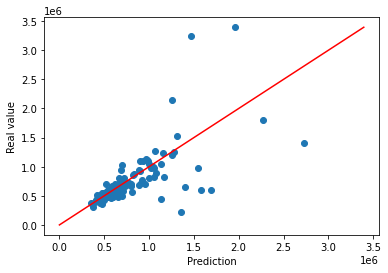

In [202]:
# Build a plot
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')
# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [204]:
df2 = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred.ravel()})

df2.shape



(135, 2)

In [205]:
df2['Diff']=round((df2.Actual-df2.Predicted),0)
df2.head()
print(df2.Diff.std())
print(df2.corr())

322665.2752635392
             Actual  Predicted      Diff
Actual     1.000000   0.674937  0.562856
Predicted  0.674937   1.000000 -0.230003
Diff       0.562856  -0.230003  1.000000


<AxesSubplot:>

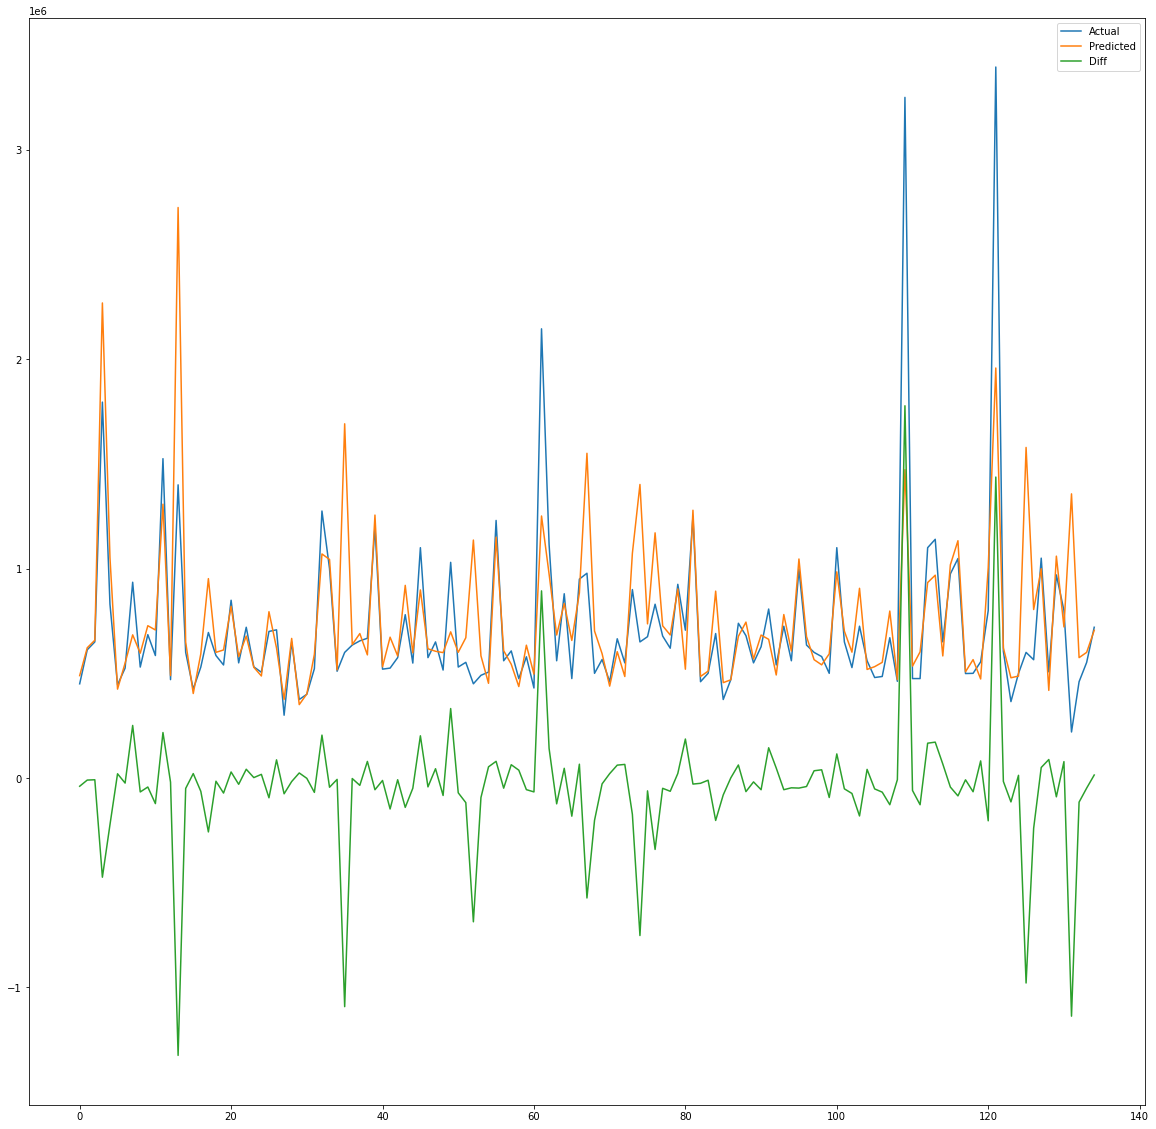

In [206]:
df2.plot(figsize=(20,20))

In [150]:
# We can see that there is significant variation in the predicted values cf. actuals in the test data.

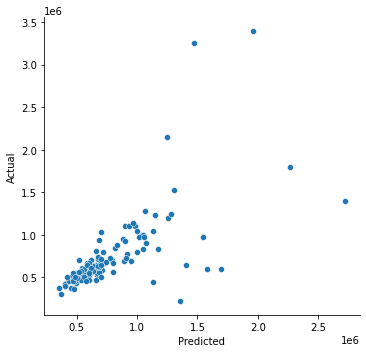

In [208]:
sns.relplot(x='Predicted',y='Actual',data=df2,kind='scatter')

### Upper Range: We select Liv_index at the upper of the range 50-90

 81, 85, 84, 79, 71, 83, 78, 74, 80, 77, 82, 86,

In [181]:
df_up=df.loc[df.Liv_index.isin([81, 85, 84, 79, 71, 83, 78, 74, 80, 77, 82, 86])]
# df3=df1.groupby(['ZipCode','Beds']).agg(['min','max'])
df_up['Liv_index']=df_up['Liv_index'].astype('str') #So that we can use pd dummies
df_up['Liv_index'].dtype




ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


dtype('O')

In [182]:
df_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1612 entries, 98 to 4127
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ZipCode    1612 non-null   int64  
 1   Price      1612 non-null   int64  
 2   Beds       1612 non-null   float64
 3   Baths      1612 non-null   float64
 4   Sqft       1612 non-null   int64  
 5   Lot_sqft   1612 non-null   float64
 6   Liv_index  1612 non-null   object 
dtypes: float64(3), int64(3), object(1)
memory usage: 100.8+ KB


In [183]:
X=df_up.copy()
X=X.drop(columns = ['Price'])
X=pd.get_dummies(X)
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(X),columns = X.columns)
X.shape

(1612, 17)

In [184]:
y=df_up['Price']
y.shape

(1612,)

In [185]:
# Model considering all variables- ZipCode, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred_up = model.predict(X_test)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,mean_squared_error
print('MSE:',mean_squared_error(y_test, y_pred_up))
print('MAE:', mean_absolute_error(y_test, y_pred_up))


MSE: 1212310274153.4548
MAE: 373729.22869969043


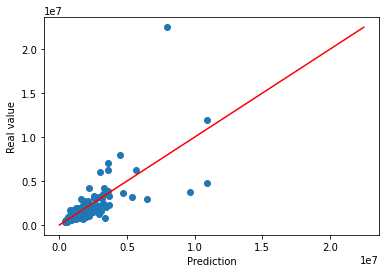

1102751.6644813048
             Actual  Predicted      Diff
Actual     1.000000   0.742922  0.638853
Predicted  0.742922   1.000000 -0.040353
Diff       0.638853  -0.040353  1.000000


In [186]:
# Build a plot
import matplotlib.pyplot as plt

plt.scatter(y_pred_up, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')
# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()
df22 = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred_up.ravel()})



df22['Diff']=round((df22.Actual-df22.Predicted),0)
df22.head()
print(df22.Diff.std())
print(df22.corr())

<AxesSubplot:>

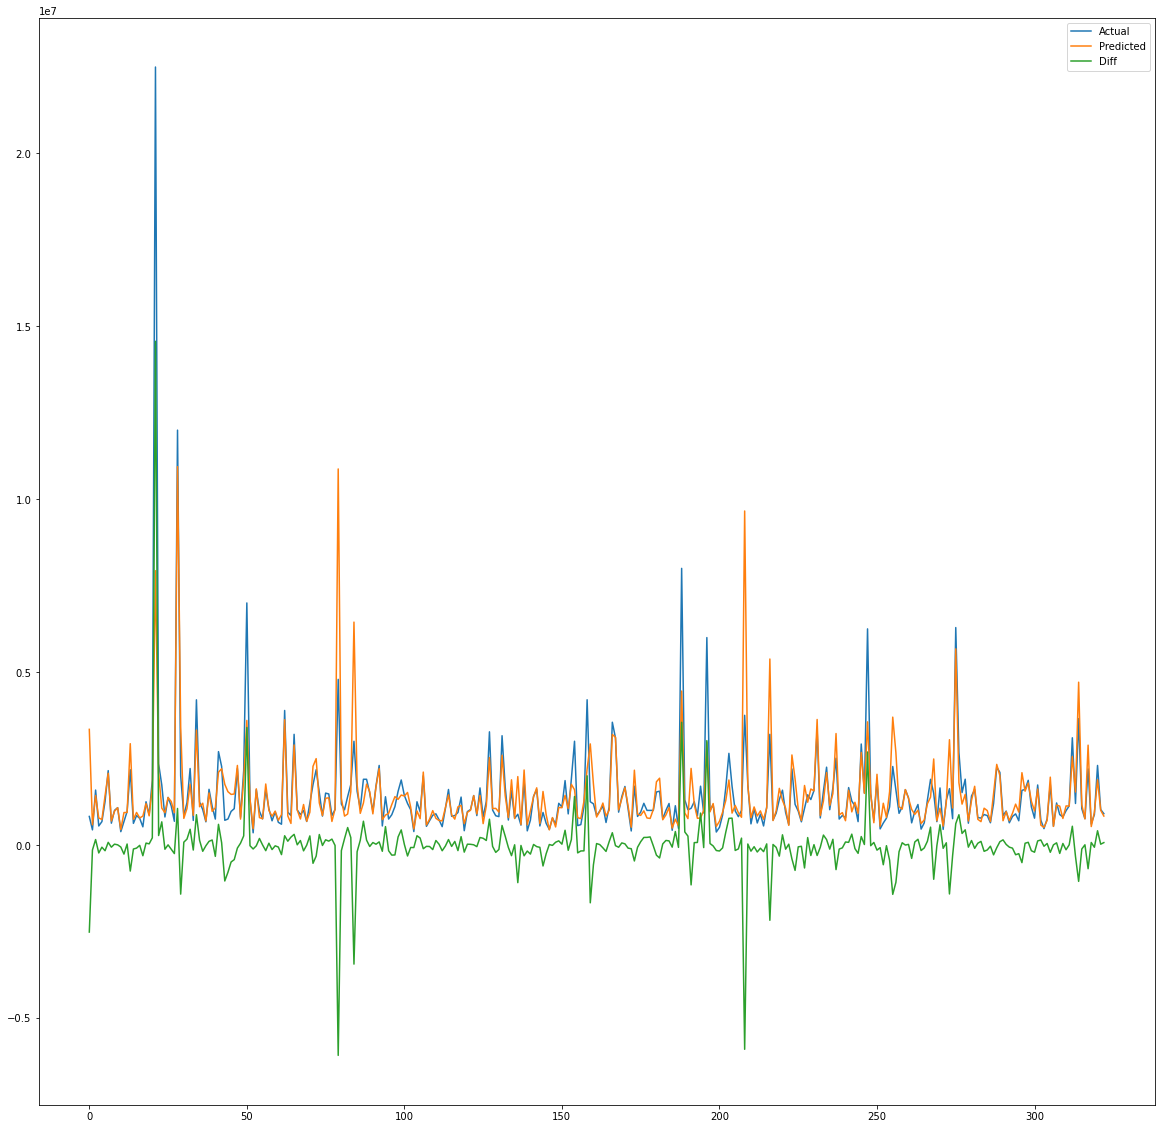

In [187]:
df22.plot(figsize=(20,20))

In [188]:
# This shows a fairly good  prediction for the homes in the upper range of the Liv_index.



## Price Adjustment . We increase the predicted price by 100K (est.) we are able to decrease the differnce between the Actual and Adjusted Predicted.

In [226]:
import seaborn as sns


df22['Adjusted_Price']=df22['Predicted']+100000
df22['Adj-Actual']=df22['Adjusted_Price']-df22['Actual']
df22.head()

,Actual,Predicted,Diff,Adjusted_Price,Adj-Actual
0,825000,3343656.215,-2518656.0,3443656.215,2618656.215
1,437000,581838.470,-144838.0,681838.470,244838.470
2,1588000,1431346.700,156653.0,1531346.700,-56653.300
3,550000,780596.690,-230597.0,880596.690,330596.690
4,674950,739009.900,-64060.0,839009.900,164059.900


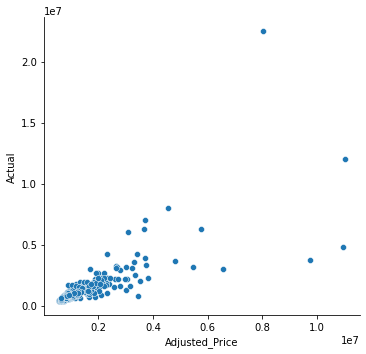

In [227]:
sns.relplot(y='Actual',x='Adjusted_Price',data=df22,kind='scatter')

<AxesSubplot:title={'center':'Predicted + 100K '}>

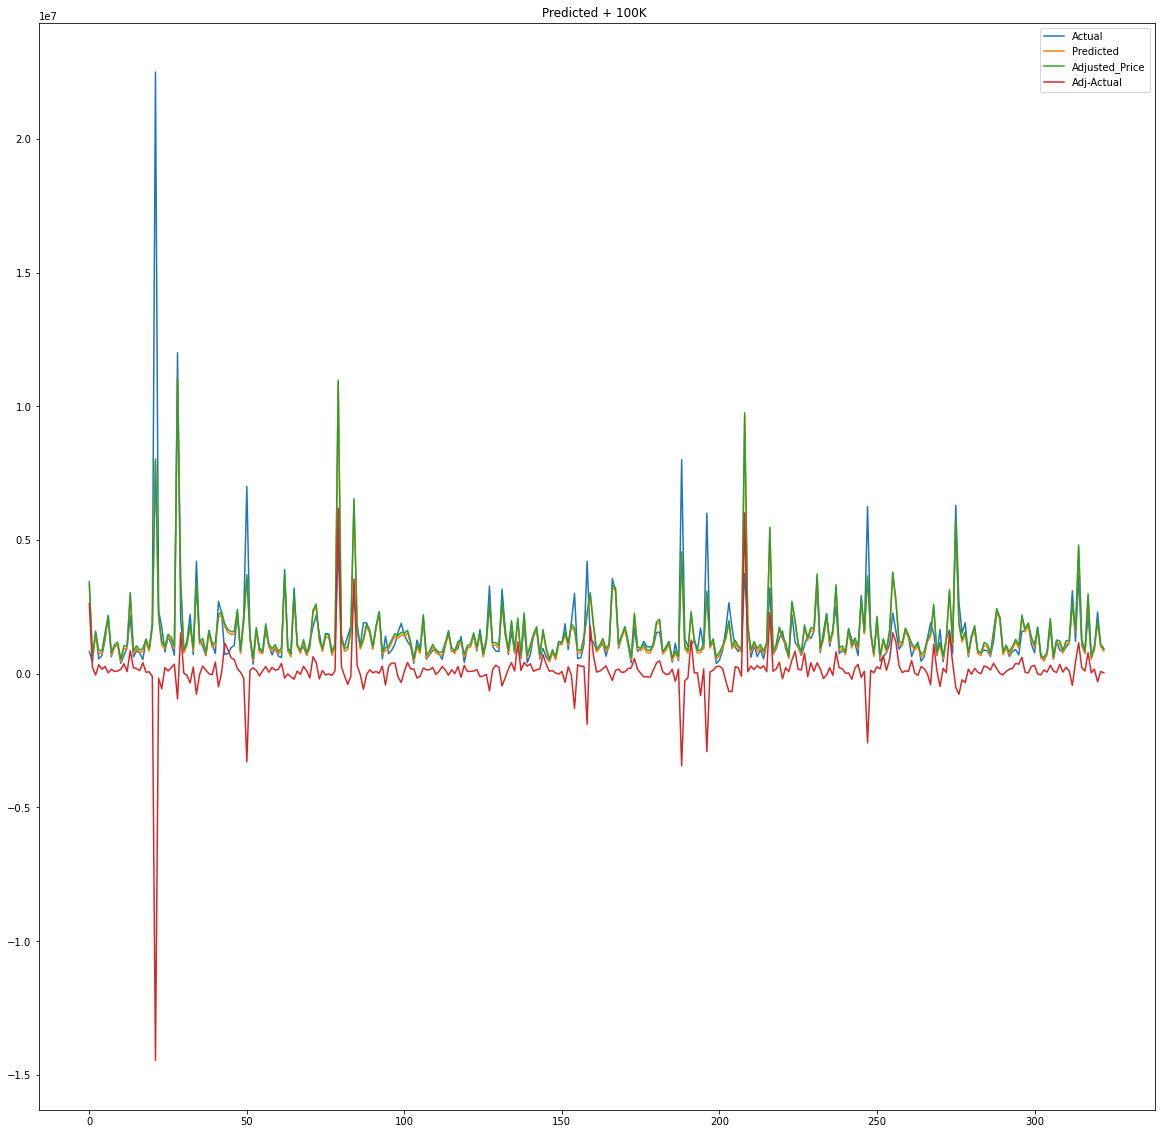

In [228]:
df23=df22.drop(columns=['Diff'])
df23.plot(figsize=(20,20),title='Predicted + 100K ')

In [231]:
# sns.heatmap(data=df23)